In [1]:
# Importing libraries
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# Loading the data from the drive and saving it to Categories
DATADIR ="C:/study_material/capp/retina/1 vs 2,3,4"
CATEGORIES = ['1','2,3,4']

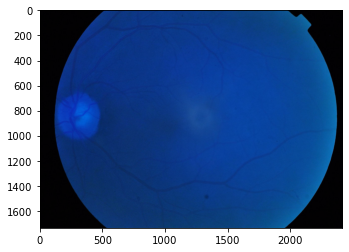

In [3]:
# a loop to read 1 image of a category to check if the code would work 

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap= 'gray')
        plt.show()
        break
    break

In [4]:
# creating the training dataset using the images of all 5 categories

training_data = []
IMG_SIZE = 200
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
              new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
              continue
            training_data.append([new_array,class_num])

create_training_data()


In [5]:
len(training_data)

2386

In [6]:
# empty lists to append images and labels
X = []
y = []

In [7]:
# appending images to list X and labels to list Y
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

In [8]:
len(X),len(y)

(2386, 2386)

In [9]:
# normalising the data

X_train = X/255


In [10]:
# converting the train and test data into arrays

X_train = np.array(X_train)
y_train=y

In [11]:
#Laoding Val_Test data
DATADIR ="C:/study_material/capp/retina/Val_Test(1 vs 234)"
CATEGORIES = ['1','2,3,4']

# creating the val_test dataset 
validation_data = []
IMG_SIZE = 200
def create_validation_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
                continue
            validation_data.append([new_array,class_num])

create_validation_data()

In [12]:
# empty lists to append images and labels
X = []
y = []
# appending images to list X and labels to list Y
for features,label in validation_data:
    X.append(features)
    y.append(label)
X = np.array(X)

# normalising the data
X_test = X/255
y_test = y

# converting the train and test data into arrays
X_test = np.array(X_test)

In [14]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(2,2), activation='tanh', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(2,2), activation='tanh', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='tanh', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(2,2), activation='tanh'),
    layers.MaxPooling2D((2, 2)),

    

    layers.Flatten(),
    layers.Dense(256, activation='tanh'),
    layers.Dense(2, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(np.array(X_train), np.array(y_train), epochs=15)

Epoch 1/15
75/75 [==============================] - 47s 625ms/step - loss: 0.4542 - accuracy: 0.7904
Epoch 2/15
75/75 [==============================] - 47s 621ms/step - loss: 0.4499 - accuracy: 0.7871
Epoch 3/15
75/75 [==============================] - 46s 616ms/step - loss: 0.3931 - accuracy: 0.8210
Epoch 4/15
75/75 [==============================] - 46s 619ms/step - loss: 0.3353 - accuracy: 0.8609
Epoch 5/15
75/75 [==============================] - 46s 617ms/step - loss: 0.3083 - accuracy: 0.8734
Epoch 6/15
75/75 [==============================] - 46s 614ms/step - loss: 0.2171 - accuracy: 0.9132
Epoch 7/15
75/75 [==============================] - 46s 613ms/step - loss: 0.2089 - accuracy: 0.9179
Epoch 8/15
75/75 [==============================] - 46s 610ms/step - loss: 0.1417 - accuracy: 0.9493
Epoch 9/15
75/75 [==============================] - 46s 609ms/step - loss: 0.0984 - accuracy: 0.9711
Epoch 10/15
75/75 [==============================] - 46s 620ms/step - loss: 0.0961 - accura

In [18]:
cnn.evaluate(np.array(X_test),np.array(y_test))

6/6 [==============================] - 1s 61ms/step - loss: 0.9719 - accuracy: 0.8171


[0.9719178080558777, 0.8171428442001343]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:20]

6/6 [==============================] - 1s 69ms/step


array([[8.8731028e-02, 9.1126895e-01],
       [6.6752577e-01, 3.3247423e-01],
       [9.8508102e-01, 1.4918972e-02],
       [6.0537509e-03, 9.9394625e-01],
       [7.5293732e-01, 2.4706270e-01],
       [5.2711912e-05, 9.9994731e-01],
       [1.6824148e-05, 9.9998319e-01],
       [3.7801921e-01, 6.2198085e-01],
       [9.5063215e-01, 4.9367886e-02],
       [9.9954283e-01, 4.5725604e-04],
       [1.0409619e-03, 9.9895906e-01],
       [9.9352646e-01, 6.4736065e-03],
       [4.4130854e-02, 9.5586914e-01],
       [9.9312311e-01, 6.8768663e-03],
       [1.2003369e-01, 8.7996632e-01],
       [9.7988276e-03, 9.9020118e-01],
       [7.6042896e-09, 1.0000000e+00],
       [9.3992978e-01, 6.0070213e-02],
       [6.2292092e-05, 9.9993765e-01],
       [4.8459273e-02, 9.5154071e-01]], dtype=float32)

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

6/6 [==============================] - 1s 105ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.33      0.36        27
           1       0.88      0.91      0.89       148

    accuracy                           0.82       175
   macro avg       0.64      0.62      0.63       175
weighted avg       0.81      0.82      0.81       175



In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]

In [22]:
y_test[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
import sklearn

In [24]:
sklearn.metrics.roc_auc_score(y_test, y_pred_classes)

0.6193693693693694

In [25]:
cnn.save('s_9.h5')